In [2]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("US Superstore data.xls")



%matplotlib inline
#Removal of duplicates
df = df.drop_duplicates()
#datetime format for date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head()
#removal of missing  data
missing_data = df.isnull().sum()
#calculation and chart of profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100


print(df['Profit Margin'])
#print(missing_data.head())


0       16.00
1       30.00
2       47.00
3      -40.00
4       11.25
        ...  
9989    16.25
9990    17.00
9991     7.50
9992    45.00
9993    30.00
Name: Profit Margin, Length: 9994, dtype: float64


Calcul de la marge de profit / vente

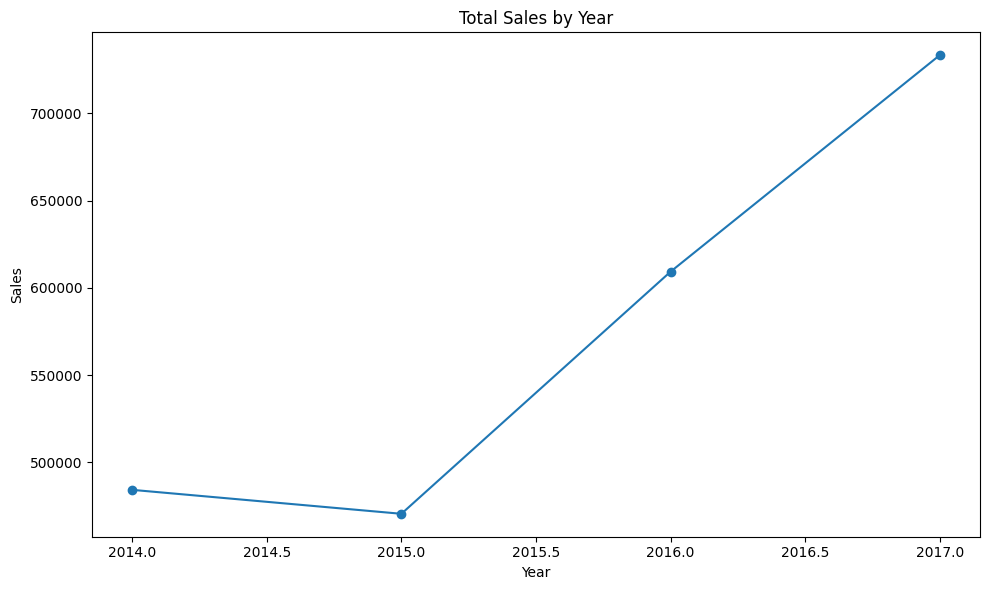

In [62]:
# 1 'Order Date' converted to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 2 Year extracted
df['Year'] = df['Order Date'].dt.year
df['Year'] = df['Year'].astype('Int64')
# 3  Group by year and sum sales
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# 4  Line plot
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Sales'], marker='o', linestyle='-')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(False)
plt.tight_layout()
plt.show()


The line chart above allows one to see there has been a great increase of sales from 2015 onwards.

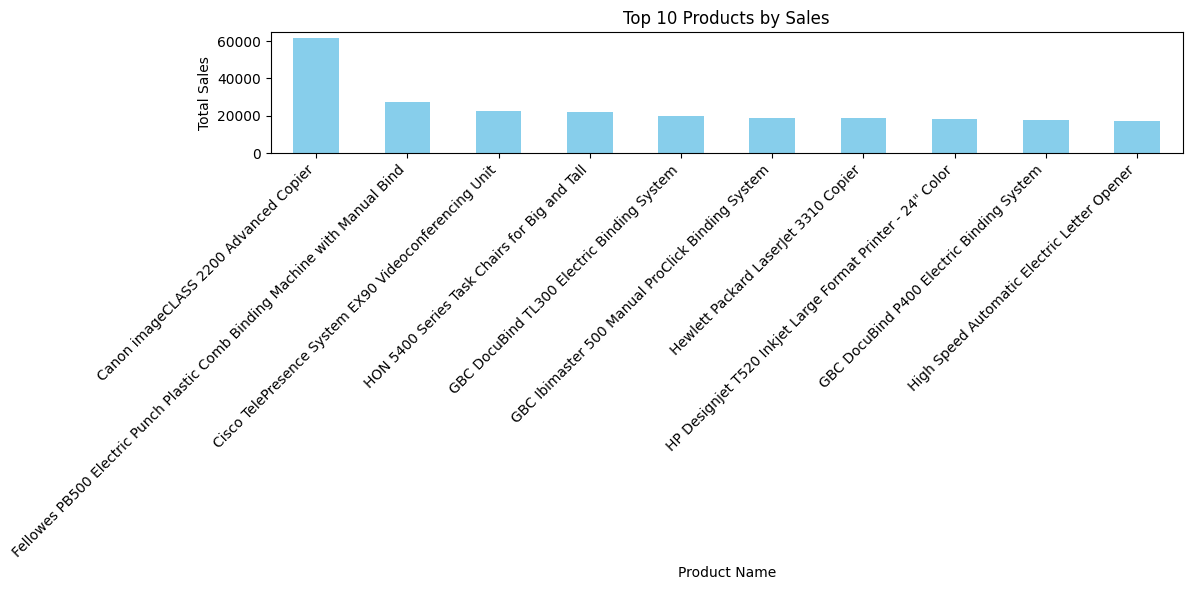

In [ ]:
# Group by product and sum sales
top10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)

# bar plot
plt.figure(figsize=(12, 6))
top10_products.plot(kind='bar', color='skyblue')

# Formatting
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart emphasizes the best sales (best product) among the top ten products.

In [20]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Display of main categories
Data type of date columns is numerical. 
The time frame of this dataset is the period 2014-2018.

In [21]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No missing value in the different categories.
No significant gaps in the data.

In [34]:
qualitative_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(qualitative_columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')


In [27]:
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(quantitative_columns)

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


Comment: that data analysis gives us a general view  of the company sales.